```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](https://github.com/vlvovch/PHYS6350-ComputationalPhysics/blob/spring2025/slides/Lecture11-02-20-25-OrdinaryDifferentialEquations.pdf)
```

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def ode_euler_step(f, x, t, h):
    """Perform a single step h using Euler's scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    return x + h * f(x,t)

def ode_euler(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_euler_step(f, x[i], t[i], h)
    return t,x

In [5]:
import numpy as np

def ode_rk2_step(f, x, t, h):
    """Perform a single step h using 2nd order Runge-Kutta scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    return x + k2

def ode_rk2(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

In [6]:
def ode_rk4_step(f, x, t, h):
    """Perform a single step h using 4th order Runge-Kutta method.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    k3 = h * f(x + k2/2., t + h /2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using 4th order Runge-Kutta method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

In [7]:
def ode_rk4_adaptive(f, x0, t0, h0, tmax, delta = 1.e-6):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps 
    using 4th order Runge-Kutta method with adaptive time step.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
         h0: the initial time step
       tmax: the maximum time
      delta: the desired accuracy per unit time

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    ts = [t0]
    xs = [x0]
    h = h0
    t = t0
    i = 0
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        rho = 30. * h * delta / np.abs(x1 - x2)
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

# Systems of ODEs

## First-order ODEs

A system of $N$ first-order ODEs reads

$$
\frac{d x_1}{dt} = f_1(x_1,\ldots,x_N,t),\\
\frac{d x_2}{dt} = f_2(x_1,\ldots,x_N,t),\\
\ldots \\
\frac{d x_N}{dt} = f_N(x_1,\ldots,x_N,t).
$$

In vector notation:

$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t).
$$

All the methods we covered have exactly the same structure for systems of ODEs, applied to vectors:
- Euler method

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \, \mathbf{f}[\mathbf{x}(t),t]~.
$$


- RK2

\begin{align*}
\mathbf {k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf {k_2} & = h \, \mathbf {f}(\mathbf {x}+\mathbf {k_1}/2,t+h/2), \\
\mathbf{x}(t+h) & = \mathbf {x}(t) + \mathbf {k_2}~.
\end{align*}


- RK4

\begin{align*}
\mathbf{k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf{k_2} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_1}/2,t+h/2), \\
\mathbf{k_3} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_2}/2,t+h/2), \\
\mathbf{k_4} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_3},t+h), \\
\mathbf{x}(t+h) & = \mathbf{x}(t) + \frac{1}{6} (\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4})~.
\end{align*}


In [18]:
def ode_euler_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the Euler method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1,:] = ode_euler_step(f, x[i], t[i], h)
    return t,x

Example: System of equations

\begin{align*}
\frac{dx}{dt} & = xy - x,\\
\frac{dy}{dt} & = y - xy + (\sin t)^2
\end{align*}

Let us solve it using Euler's method:

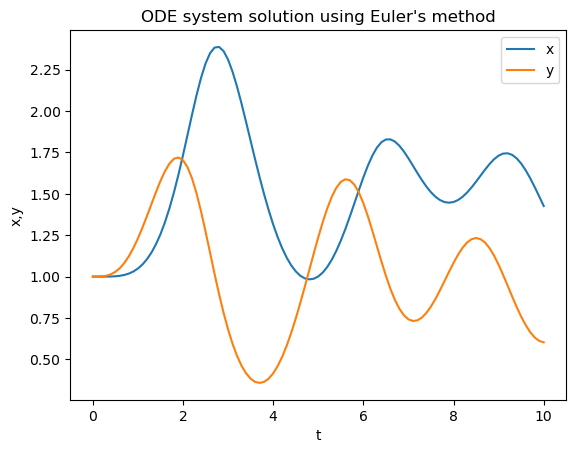

In [19]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_euler_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using Euler's method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()


Now lets us apply RK2 method

In [20]:
def ode_rk2_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK2 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

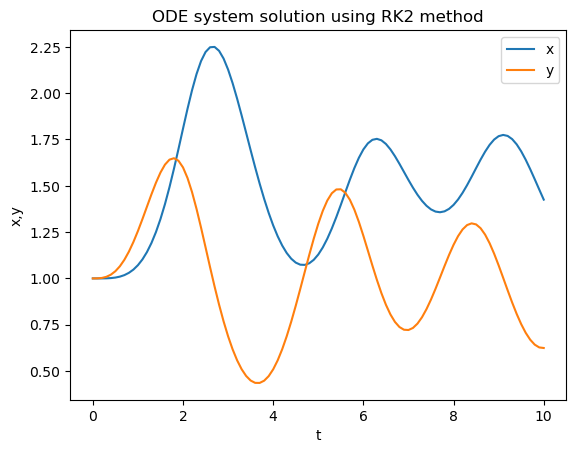

In [21]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk2_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK2 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

Finally, let us apply RK4 to the system of equations:

In [22]:
def ode_rk4_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK4 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

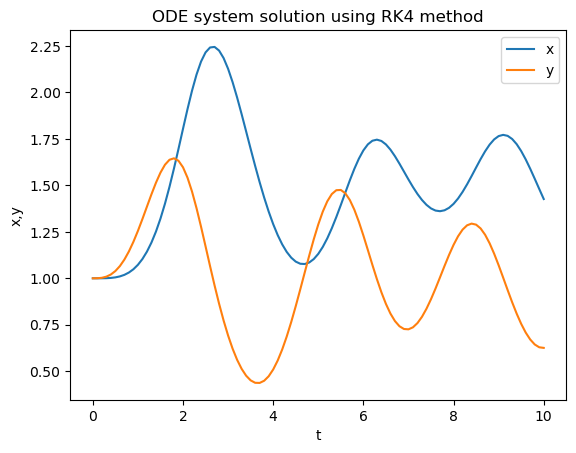

In [23]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk4_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK4 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Second-order ODEs

A system of $N$ 2nd-order ODEs

$$
\frac{d^2 \mathbf{x}}{dt^2} = \mathbf{f}(\mathbf{x}, d\mathbf{x}/dt,t),
$$

can be written as a system of $2N$ 1-st order ODEs by denoting $d\mathbf{x}/dt = \mathbf{v}$:

\begin{align*}
\frac{d \mathbf{x}}{dt} &= \mathbf{v},\\
\frac{d \mathbf{v}}{dt} &= \mathbf{f}(\mathbf{x}, \mathbf{v},t),
\end{align*}

and solved using standard methods.

This is particularly relevant for classical mechanics problems since Newton/Lagrange equations of motion correspond to a system of 2nd order ODEs.

### Example: Simple pendulum in non-linear regime

![pendulum](pendulum.gif)

The equation of motion for non-linear pendulum reads
$$
m L \frac{d^2 \theta}{dt^2} = - m g L \sin \theta.
$$

Denoting $d\theta / d t = \omega$, one can rewrite this 2nd-order differential equation as a system of two 1st-order equations
\begin{align}
\frac{d \theta}{dt} & = \omega, \\
\frac{d \omega}{dt} & = -\frac{g}{L} \sin \theta~,
\end{align}
which can be solved using standard first-order ODE methods.

For small angles $\theta$ one can approximate $\sin \theta \approx \theta$ and solved the equation
$$
m L \frac{d^2 \theta}{dt^2} \approx - m g \theta.
$$
For a pendulum initially at angle $\theta_0$, the analytic solution for small angles reads
$$
\theta(t) \approx \theta_0 \cos\left( \sqrt{\frac{g}{L}} t + \phi\right),
$$
where $\phi = 0$ if the pendulum is initially at rest.

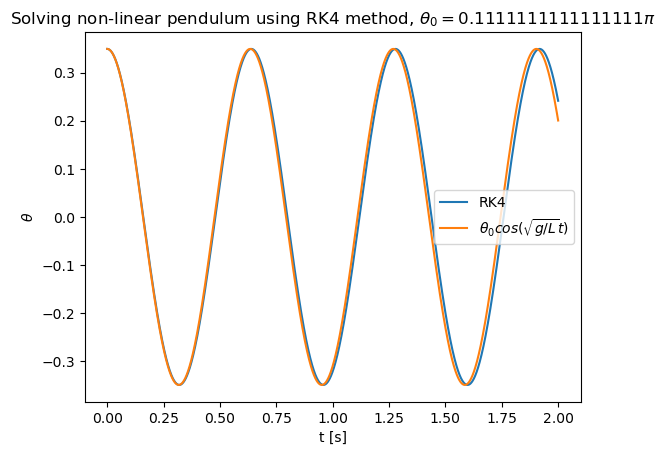

In [24]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (20./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 2.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)


plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

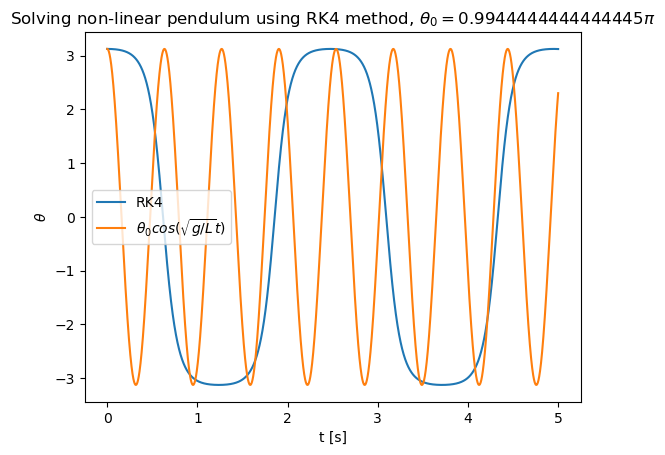

In [25]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (179./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 5.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)

plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Adaptive time step for systems of ODEs

The adaptive 4th-order Runge-Kutta method for single first-order ODE can be generalized to a system of ODEs.
One has to generalize the notion of the difference $|x_1 - x_2|$ between two estimates of the independent variable to the case of vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ of variables.

The simplest choice would be to evaluate the modulus of the difference vector $|\mathbf{x}_1 - \mathbf{x}_2|$, which would be the default choice. Alternatively, in some cases we may only be interested in the accuracy of a single variable from the vector, for example of coordinate $x$ but not of velocity $v$ in case of a second-order ODE cast as system of two first-order ODEs. In this case one can generalize the definition of the distance between $\mathbf{x}_1$ and $\mathbf{x}_2$ as appropriate for the problem at hand.

The implementation of the RK4 scheme with adaptive time step for a system of ODEs can be implemented as follows.

In [22]:
# The default definition of the error (distance) between two state vectors 
# Default: the magnitude of the difference vector
def distance_definition_default(x1, x2):
    diff = x1 - x2
    diffnorm = np.sqrt(np.dot(diff, diff))
    return diffnorm

def ode_rk4_adaptive_multi(f, x0, t0, h0, tmax, delta = 1.e-6, distance_definition = distance_definition_default):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps 
    using 4th order Runge-Kutta method with adaptive time step.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
         h0: the initial time step
       tmax: the maximum time
      delta: the desired accuracy per unit time

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    ts = [t0]
    xs = [x0]
    
    h = h0
    t = t0
    i = 0
        
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        diffnorm = distance_definition(x1, x2)
        if diffnorm == 0.: # To avoid the division by zero
            rho = 2.**4
        else:
            rho = 30. * h * delta / diffnorm
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

Let us apply the adaptive RK4 method to simulate the motion of a pendulum maintaining the nee.

In [26]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])

def error_definition_pendulum(x1, x2):
    return np.abs(x1[0] - x2[0])

theta0 = (179./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 3.0
N = 500
h0 = (b-a)/N
eps = 1.e-3 # accuracy in theta
sol = ode_rk4_adaptive_multi(fpendulum, x0, a, h0, b, eps, error_definition_pendulum)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]


plt.title("Solving non-linear pendulum using adaptive RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,'.',label='Adaptive RK4, ${\\theta}$ accuracy = ' + str(eps) + ' ${s^{-1}}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time step lenghts")
plt.xlabel('t [s]')
plt.ylabel('h [s]')
plt.plot(thpoints,hpoints,'.',label='Adaptive RK4, ${\\theta}$ accuracy = ' + str(eps) + ' ${s^{-1}}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

NameError: name 'ode_rk4_adaptive_multi' is not defined

## Example: Comet motion 

This is Exercise 8.10 from M. Newman *Computational Physics*



Many comets travel in highly elongated orbits around the Sun.  For
much of their lives they are far out in the solar system, moving very
slowly, but on rare occasions their orbit brings them close to the Sun for
a fly-by and for a brief period of time they move very fast indeed:

<img src="comet.gif" alt="Comet" style="width: 600px;"/> 

This is a classic example of a system for which an adaptive
step size method is useful, because for the large periods of time when the
comet is moving slowly we can use long time-steps, so that the program runs
quickly, but short time-steps are crucial in the brief but fast-moving
period close to the Sun.

The differential equation obeyed by a comet is straightforward to
derive.  The force between the Sun, with mass $M$ at the origin, and a
comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction
$-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's
second law tells us that

$$
m {d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
$$

Canceling the mass $m$ and taking the $x$ component we have

$$
{d^2 x\over d t^2} = -GM {x\over r^3}\,,
$$

and similarly for the other two coordinates.  We can, however, throw out
one of the coordinates because the comet stays in a single plane as it
orbits.  If we orient our axes so that this plane is perpendicular to
the $z$-axis, we can forget about the $z$ coordinate and we are left with
just two second-order equations to solve:
\begin{align*}
{d^2 x\over d t^2} & = -GM {x\over r^3}\,, \\
{d^2 y\over d t^2} & = -GM {y\over r^3}\,,
\end{align*}
where $r=\sqrt{x^2+y^2}$.

We will write a program to the equations using the fourth-order
Runge--Kutta method with a *fixed* step size.  
As an initial condition, we take a comet at coordinates $x=4$ billion kilometers
and $y=0$ (which is somewhere out around the orbit of Neptune) with
initial velocity $v_x=0$ and $v_y = 500\,\mathrm{m\,s}^{-1}$. The trajectory of the comet will be a plot of $y$
against $x$.

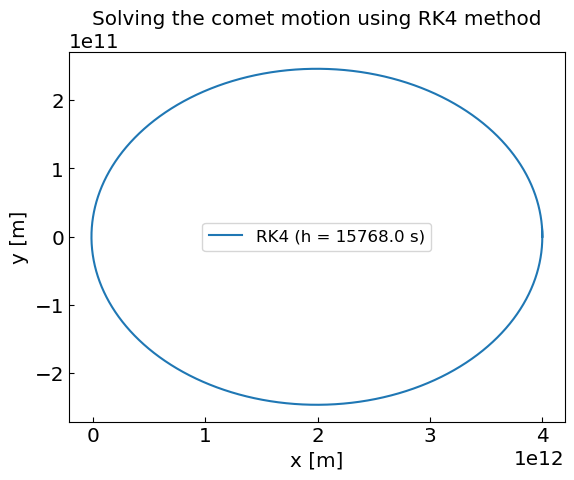

In [24]:
G = 6.67430e-11  # m^3 / kg / s^2
Msun = 1.9885e30 # kg

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    r = np.sqrt(x*x+y*y)
    return np.array([vx,vy,-G*Msun*x/r**3,-G*Msun*y/r**3])

x0 = [4.e12,0.,0.,500.]

a = 0.
b = 50. * 365. * 24. * 60. * 60. # 50 years
N = 100000                       # 100 thousand RK4 steps
h = (b - a) / N                  # Time step: around 1/5th of a day
sol = ode_rk4_multi(fcomet, x0, a, h, N)

tpoints_rk4_ref = sol[0]
xpoints_rk4_ref = sol[1][:,0]
ypoints_rk4_ref = sol[1][:,1]
vxpoints_rk4_ref = sol[1][:,2]
vypoints_rk4_ref = sol[1][:,3]
vpoints_rk4_ref = [np.sqrt(x[2]*x[2] + x[3]*x[3]) for x in sol[1]]


plt.title("Solving the comet motion using RK4 method")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(xpoints_rk4_ref,ypoints_rk4_ref,label='RK4 (h = ' + str(h) + ' s)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

Let us now use the RK4 method with an adaptive time step. We expect to have a smaller step near the sun, where the comet motion is faster, and a larger step away from the sun

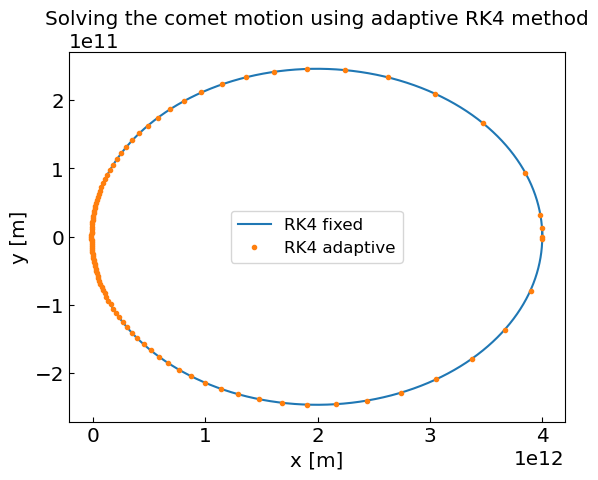

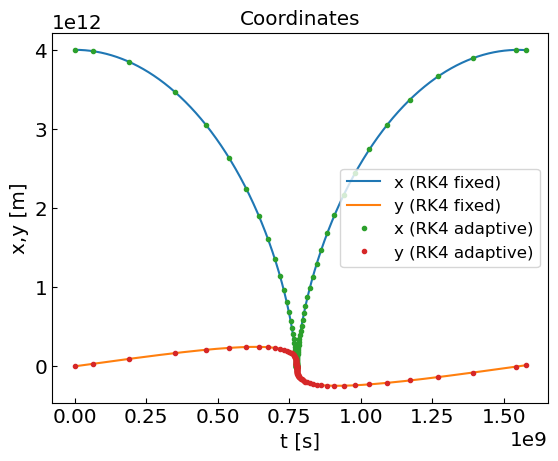

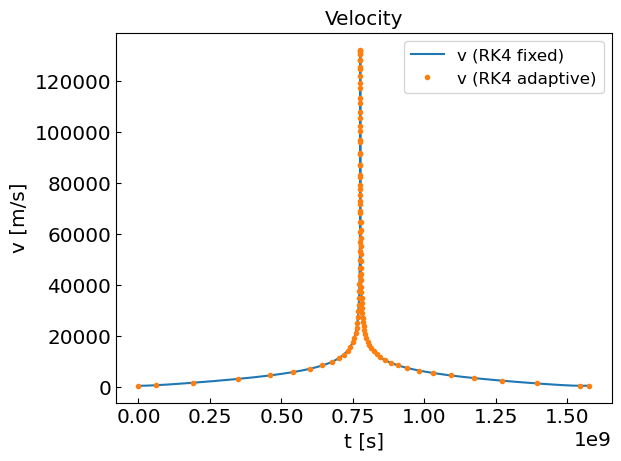

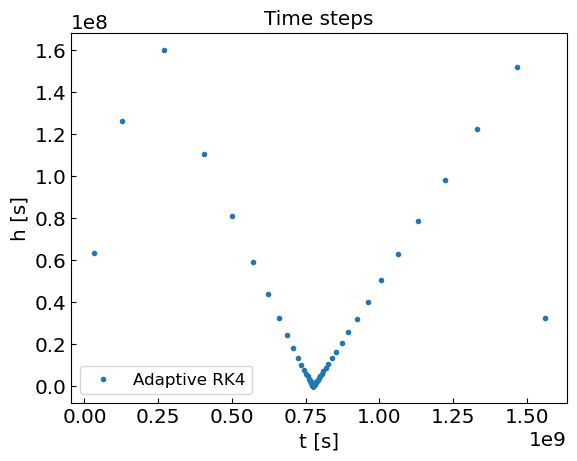

In [25]:
G = 6.67430e-11
Msun = 1.9885e30

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    r = np.sqrt(x*x+y*y)
    return np.array([vx,vy,-G*Msun*x/r**3,-G*Msun*y/r**3])

def error_definition_comet(x1, x2):
    return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

x0 = [4.e12,0.,0.,500.]

a = 0.
b = 50. * 365. * 24. * 60. * 60. # 50 years
h0 = 1. * 365. * 24. * 60. * 60. # Initial time step: 1 year
delta = 1000. * 1.e3 / (365. * 24. * 60. * 60.)
sol = ode_rk4_adaptive_multi(fcomet, x0, a, h0, b, delta, error_definition_comet)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]
vxpoints = [x[2] for x in sol[1]]
vypoints = [x[3] for x in sol[1]]
vpoints = [np.sqrt(x[2]*x[2] + x[3]*x[3]) for x in sol[1]]

plt.title("Solving the comet motion using adaptive RK4 method")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(xpoints_rk4_ref,ypoints_rk4_ref,label='RK4 fixed')
plt.plot(xpoints,ypoints,'.',label='RK4 adaptive')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Coordinates")
plt.xlabel('t [s]')
plt.ylabel('x,y [m]')
plt.plot(tpoints_rk4_ref,xpoints_rk4_ref,label='x (RK4 fixed)')
plt.plot(tpoints_rk4_ref,ypoints_rk4_ref,label='y (RK4 fixed)')
plt.plot(tpoints,xpoints,'.',label='x (RK4 adaptive)')
plt.plot(tpoints,ypoints,'.',label='y (RK4 adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Velocity")
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.plot(tpoints_rk4_ref,vpoints_rk4_ref,label='v (RK4 fixed)')
plt.plot(tpoints,vpoints,'.',label='v (RK4 adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time steps")
plt.xlabel('t [s]')
plt.ylabel('h [s]')
plt.plot(thpoints,hpoints,'.',label='Adaptive RK4')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()